# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

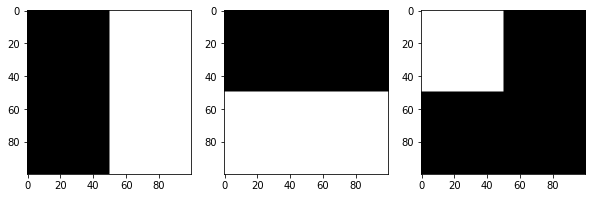

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


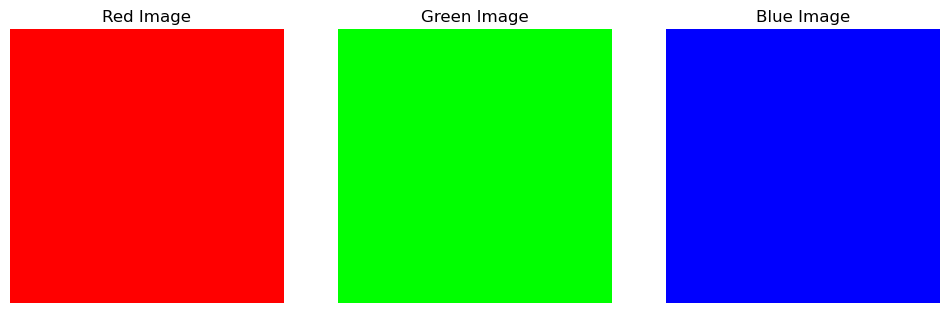

In [2]:
# solution
# Loading necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Create a 100x100 image with different color channels
# 1. Red Image
red_image = np.zeros((100, 100, 3))  # Create a black image
red_image[:, :, 0] = 1  # Set the red channel to maximum

# 2. Green Image
green_image = np.zeros((100, 100, 3))  # Create a black image
green_image[:, :, 1] = 1  # Set the green channel to maximum

# 3. Blue Image
blue_image = np.zeros((100, 100, 3))  # Create a black image
blue_image[:, :, 2] = 1  # Set the blue channel to maximum

# Visualize the created images in a 1x3 subplot
plt.figure(figsize=(12, 4))

# Display the Red Image
plt.subplot(1, 3, 1)
plt.imshow(red_image)
plt.title("Red Image")
plt.axis('off')  # Hide the axes

# Display the Green Image
plt.subplot(1, 3, 2)
plt.imshow(green_image)
plt.title("Green Image")
plt.axis('off')  # Hide the axes

# Display the Blue Image
plt.subplot(1, 3, 3)
plt.imshow(blue_image)
plt.title("Blue Image")
plt.axis('off')  # Hide the axes

# Show the plot
plt.show()




*   Use the above three images to create the following image

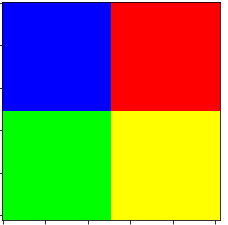
*Hint: Remember channels and color spaces*

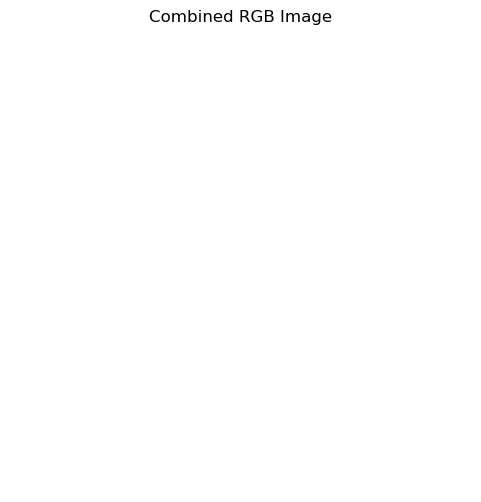

In [10]:
# solution
# Combine the Red, Green, and Blue images into one RGB image
rgb_image = np.stack((red_image[:, :, 0], green_image[:, :, 1], blue_image[:, :, 2]), axis=-1)

# Visualize the resulting RGB image
plt.figure(figsize=(6, 6))
plt.imshow(rgb_image)
plt.title("Combined RGB Image")
plt.axis('off')  # Hide the axes
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

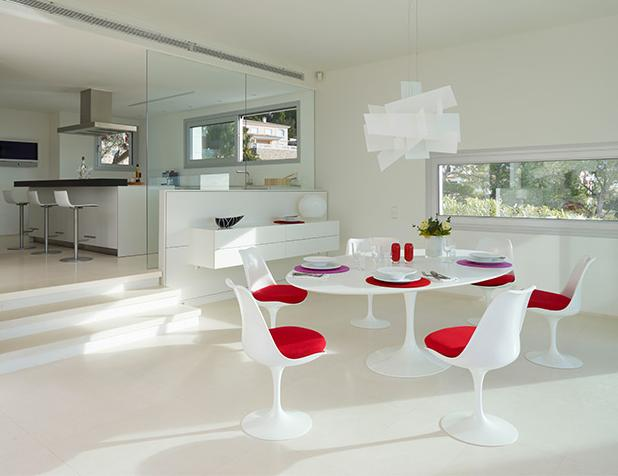

*   Extract individual channels and plot them using matplotlib subplot.



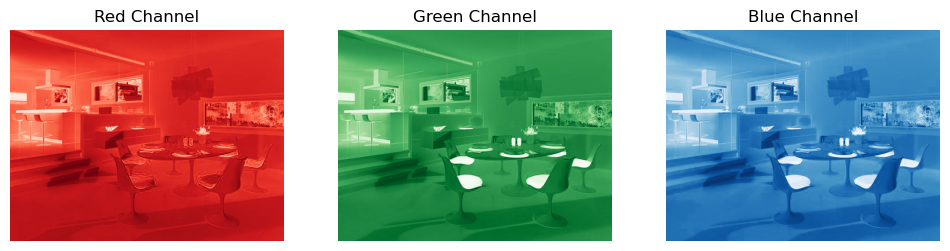

In [ ]:
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from skimage import io

# Read the image from the file
image = io.imread('images/sillas.jpg')

# Extract the individual color channels (Red, Green, Blue)
red_channel = image[:, :, 0]  # Extract the red channel
green_channel = image[:, :, 1]  # Extract the green channel
blue_channel = image[:, :, 2]  # Extract the blue channel

# Step 3: Plot the individual channels
plt.figure(figsize=(12, 4))

# Display the Red channel
plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')  # Using 'Reds' colormap to highlight the red channel
plt.title("Red Channel")
plt.axis('off')

# Display the Green channel
plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')  # Using 'Greens' colormap to highlight the green channel
plt.title("Green Channel")
plt.axis('off')

# Display the Blue channel
plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')  # Using 'Blues' colormap to highlight the blue channel
plt.title("Blue Channel")
plt.axis('off')

# Show the plot
plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

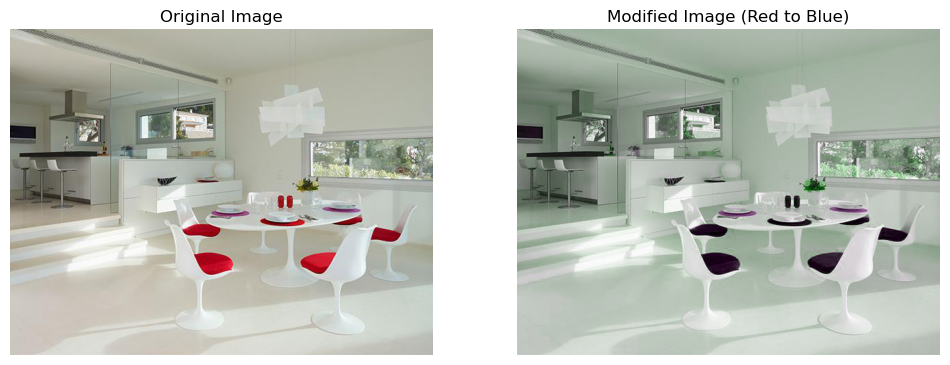

In [12]:
# solution

#  Create a new image where red parts are changed to blue
modified_image = np.copy(image)  # Copy the original image to preserve it

# Replace the red channel with the blue channel
modified_image[:, :, 0] = image[:, :, 2]  # Set the red channel to the value of the blue channel

# Step 3: Visualize the original and modified images
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Display the modified image
plt.subplot(1, 2, 2)
plt.imshow(modified_image)
plt.title("Modified Image (Red to Blue)")
plt.axis('off')

# Show the plot
plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

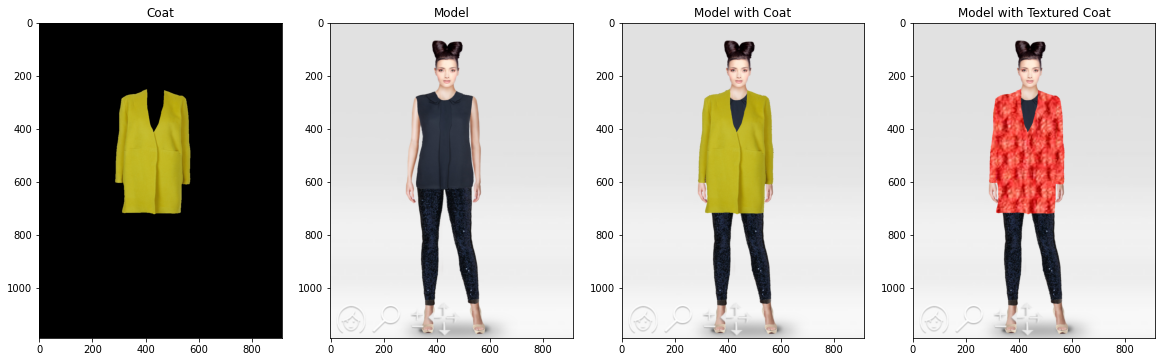

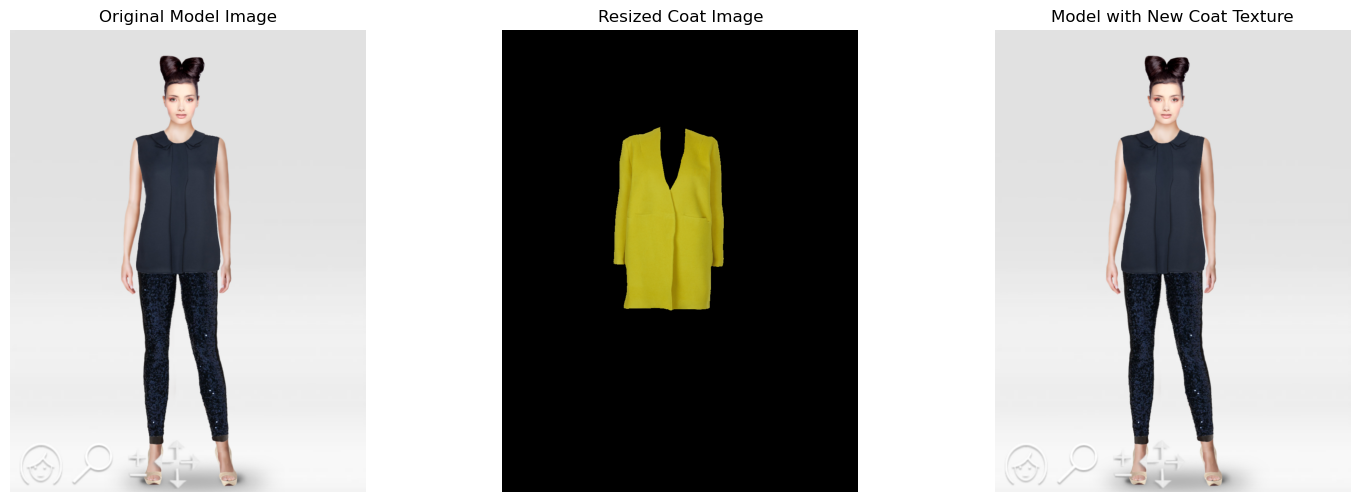

In [25]:
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from skimage.transform import resize

# Read the images
model_image = io.imread('images/model.png')
coat_image = io.imread('images/coat.png')
texture_image = io.imread('images/texture.png')  # Texture image for coat

# Ensure all images have the same dimensions (resize if necessary)
# Resize coat and texture images to match the model image size
coat_resized = resize(coat_image, (model_image.shape[0], model_image.shape[1]), mode='reflect', anti_aliasing=True)
texture_resized = resize(texture_image, (model_image.shape[0], model_image.shape[1]), mode='reflect', anti_aliasing=True)

#Ensure that all images have the same number of channels (3 channels for RGB)
if coat_resized.shape[2] != 3:
    # If the image has more than 3 channels, we slice only the first 3 channels
    coat_resized = coat_resized[:, :, :3]

if texture_resized.shape[2] != 3:
    # If the image has more than 3 channels, we slice only the first 3 channels
    texture_resized = texture_resized[:, :, :3]

if model_image.shape[2] != 3:
    # If the image has more than 3 channels, we slice only the first 3 channels
    model_image = model_image[:, :, :3]

#  Create a mask for the coat area (assuming coat has a dominant color, e.g., green)
mask = coat_resized[:, :, 1] > 100  # Create a mask based on the green channel

#Resize the mask to match the dimensions of the model image if needed
mask_resized = np.resize(mask, (model_image.shape[0], model_image.shape[1]))  # Ensure mask has correct size

# Replace the coat area in the model image with the resized coat
model_with_coat = np.copy(model_image)

# Apply the mask to all 3 channels (RGB)
for i in range(3):  # Loop through the three channels (R, G, B)
    model_with_coat[:, :, i][mask_resized] = coat_resized[:, :, i][mask_resized]

# Change the texture of the coat using a new texture
model_with_texture = np.copy(model_with_coat)

# Apply the texture to the coat area (same for all 3 channels)
for i in range(3):  # Loop through the three channels (R, G, B)
    model_with_texture[:, :, i][mask_resized] = texture_resized[:, :, i][mask_resized]

# Step 8: Visualize the images
plt.figure(figsize=(18, 6))

# Display the original model image
plt.subplot(1, 3, 1)
plt.imshow(model_image)
plt.title("Original Model Image")
plt.axis('off')

# Display the resized coat image
plt.subplot(1, 3, 2)
plt.imshow(coat_resized)
plt.title("Resized Coat Image")
plt.axis('off')

# Display the final model with the new coat texture
plt.subplot(1, 3, 3)
plt.imshow(model_with_texture)
plt.title("Model with New Coat Texture")
plt.axis('off')

# Show the plot
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




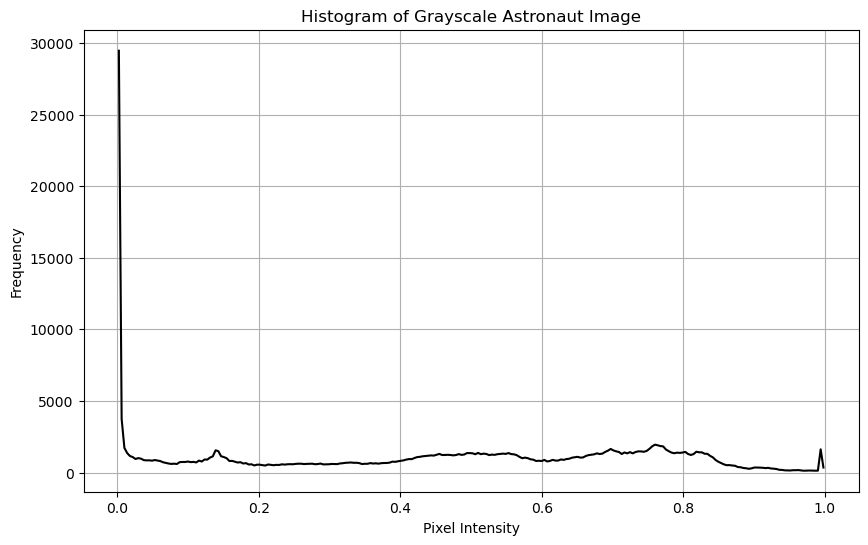

In [26]:
# solution
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, color

# Read the astronaut image from skimage.data
astronaut_image = data.astronaut()

# Convert the image to grayscale
astronaut_gray = color.rgb2gray(astronaut_image)

# Compute the histogram of the grayscale image
hist, bin_edges = exposure.histogram(astronaut_gray)

# Plot the histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(bin_edges, hist, color='black')
plt.title("Histogram of Grayscale Astronaut Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (8,).

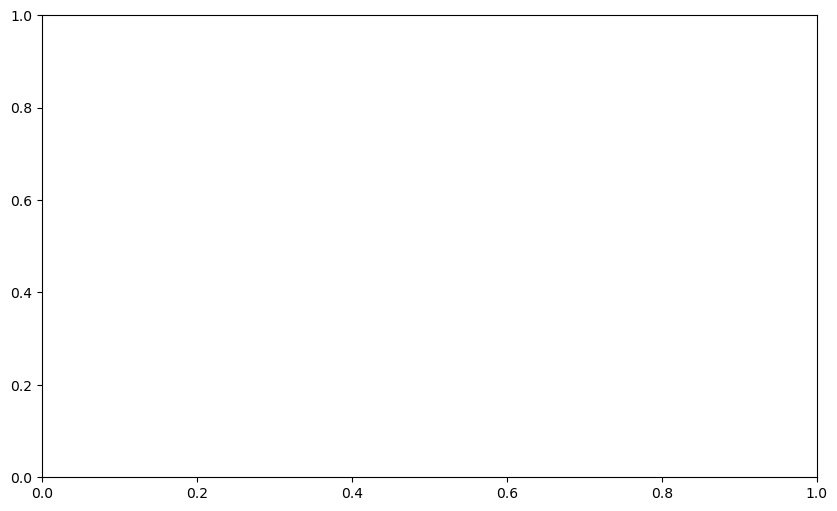

In [ ]:
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, color

# Read the astronaut image from skimage.data
astronaut_image = data.astronaut()

# Convert the image to grayscale
astronaut_gray = color.rgb2gray(astronaut_image)

# Compute the histogram of the grayscale image with 8 bins
hist, bin_edges = exposure.histogram(astronaut_gray, nbins=8)

# Plot the histogram using matplotlib (bar plot)
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist, width=bin_edges[1] - bin_edges[0], color='black', align='edge')  # Adjust width for proper alignment
plt.title("Histogram of Grayscale Astronaut Image with 8 Bins")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*Changing the bin count affects the level of detail in the histogram: a low bin count simplifies the data, losing finer details, while a high bin count may show noise. The correct bin count balances detail and noise, often determined by the data size and the analysis goal, with a common rule being the square root of the data points.*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


ValueError: x and y must have same first dimension, but have shapes (255,) and (256,)

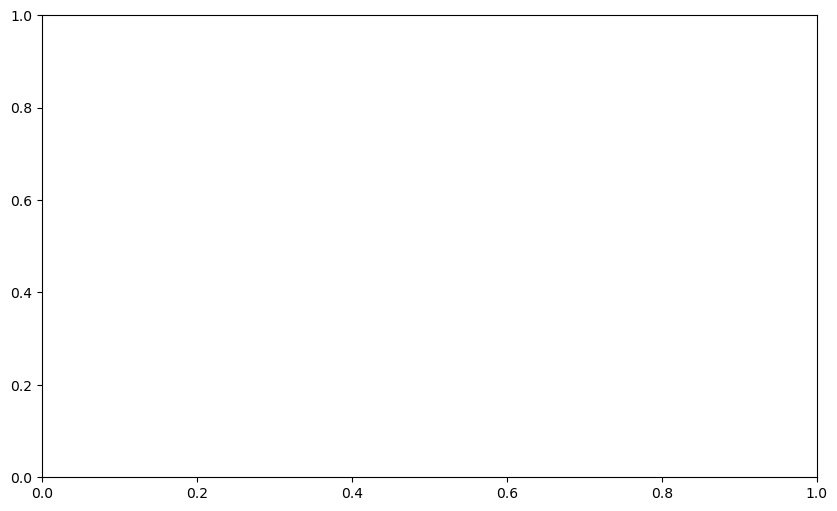

In [33]:
#solution

# Read the astronaut image from skimage.data (or use any color image)
astronaut_image = data.astronaut()

# Compute histograms for each channel (R, G, B)
red_hist, red_bins = exposure.histogram(astronaut_image[:, :, 0])  # Red channel
green_hist, green_bins = exposure.histogram(astronaut_image[:, :, 1])  # Green channel
blue_hist, blue_bins = exposure.histogram(astronaut_image[:, :, 2])  # Blue channel

#  Compute total histogram by adding up the individual channel histograms
total_hist = red_hist + green_hist + blue_hist

# Plot the histograms
plt.figure(figsize=(10, 6))

# Plot histogram for each channel
plt.plot(red_bins[:-1], red_hist, color='red', label='Red Channel')
plt.plot(green_bins[:-1], green_hist, color='green', label='Green Channel')
plt.plot(blue_bins[:-1], blue_hist, color='blue', label='Blue Channel')

# Plot the total histogram
plt.plot(red_bins[:-1], total_hist, color='black', label='Total Histogram', linestyle='--')

# Add titles and labels
plt.title("Histograms for Each Channel and Total Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()



### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



In [43]:
# solution


# Step 1: Read the image
image = io.imread('aquatermi_lowcontrast.jpg')

# Step 2: Compute the histogram of the original image
original_hist, original_bins = exposure.histogram(image)

# Step 3: Perform histogram equalization on the image
equalized_image = exposure.equalize_hist(image)

# Step 4: Compute the histogram of the equalized image
equalized_hist, equalized_bins = exposure.histogram(equalized_image)

# Step 5: Plot the images and histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image and its histogram
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')
axes[0, 1].plot(original_bins, original_hist, color='black')
axes[0, 1].set_title('Original Image Histogram')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Equalized image and its histogram
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title('Equalized Image')
axes[1, 0].axis('off')
axes[1, 1].plot(equalized_bins, equalized_hist, color='black')
axes[1, 1].set_title('Equalized Image Histogram')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()




FileNotFoundError: No such file: 'c:\Users\Lano\ironhack\week3\Day3\lab\lab-computer-vision\aquatermi_lowcontrast.jpg'


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*The equalize_hist function in the skimage.exposure library uses the cumulative distribution function (CDF) and interpolation techniques to improve contrast by redistributing pixel values ​​to cover the full range of images. In contrast, Linear Contrast Stretch uses only the minimum and maximum values ​​to statically expand the range of light intensity without using the cumulative distribution, which means that equalize_hist redistributes the data more accurately.*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



C:\Users\Lano\AppData\Local\Temp\ipykernel_22776\177340845.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('imageio:astronaut.png')
C:\Users\Lano\AppData\Local\Temp\ipykernel_22776\177340845.py:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('imageio:astronaut.png')


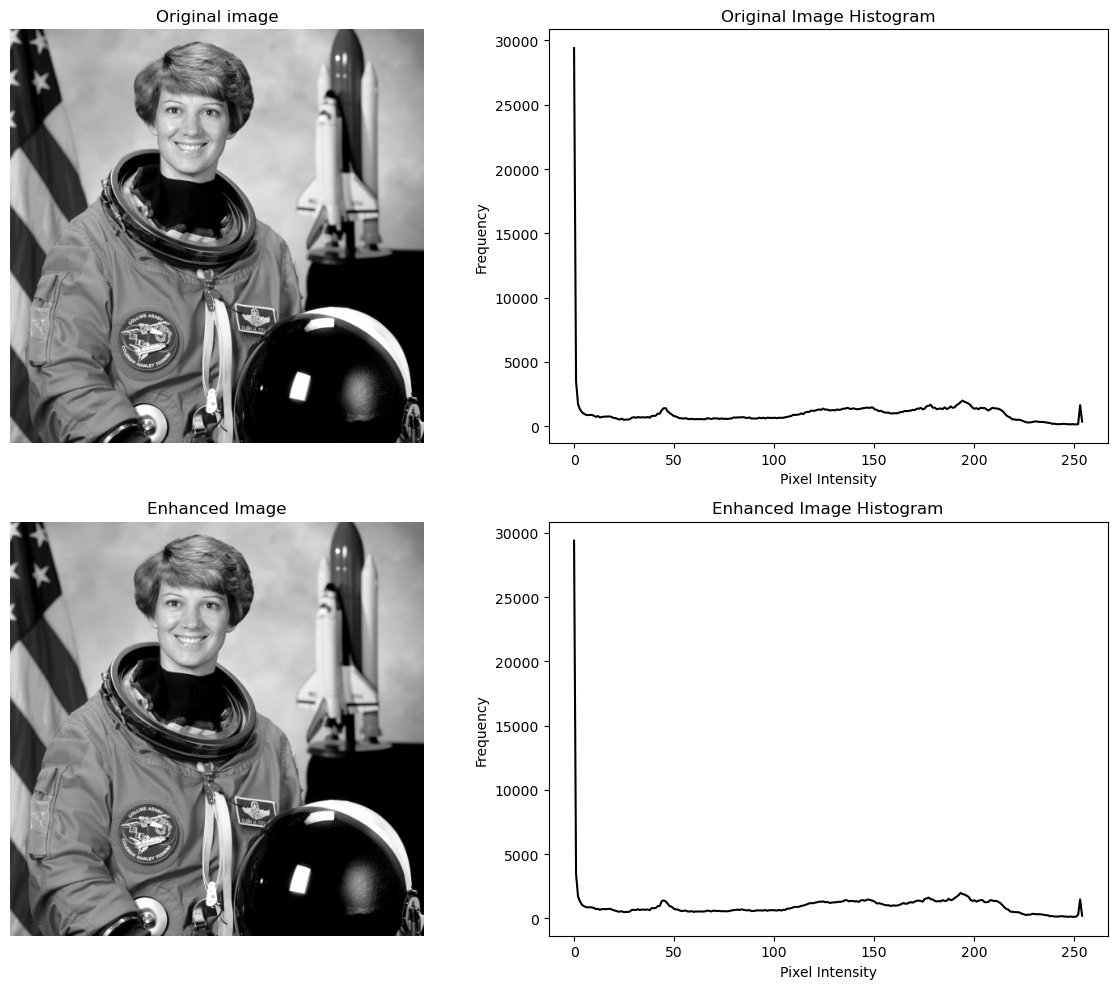

In [48]:
import imageio

# Load the merged image from imageio
image = imageio.imread('imageio:astronaut.png')

import numpy as np
import matplotlib.pyplot as plt
import imageio

# Linear Contrast Stretching Function
def linear_contrast_stretch(image, bins=256):
    # Calculate the minimum and maximum values ​​in the image
    min_pixel = np.min(image)
    max_pixel = np.max(image)

    # Apply Linear Contrast Stretching
    stretched_image = ((image - min_pixel) / (max_pixel - min_pixel)) * 255

    return stretched_image.astype(np.uint8)

# Load the image using imageio
image = imageio.imread('imageio:astronaut.png')

# Convert the image to grayscale if it is in color
if len(image.shape) == 3:
    image = np.dot(image[..., :3], [0.2989, 0.587, 0.114]) # Convert to grayscale

# Linear contrast enhancement
enhanced_image = linear_contrast_stretch(image)

# Calculating histograms
original_hist, original_bins = np.histogram(image.flatten(), bins=256, range=(0, 255))
enhanced_hist, enhanced_bins = np.histogram(enhanced_image.flatten(), bins=256, range=(0, 255))

# Drawing images and histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original image')
axes[0, 0].axis('off')

# Histogram for original image
axes[0, 1].plot(original_bins[:-1], original_hist, color='black')
axes[0, 1].set_title('Original Image Histogram')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Enhanced image
axes[1, 0].imshow(enhanced_image, cmap='gray')
axes[1, 0].set_title('Enhanced Image')
axes[1, 0].axis('off')

# Histogram of the enhanced image
axes[1, 1].plot(enhanced_bins[:-1], enhanced_hist, color='black')
axes[1, 1].set_title('Enhanced Image Histogram')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

# Display results
plt.tight_layout()
plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




Imageio: 'coins.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/coins.png (77 kB)
Downloading: 8192/78467 bytes (10.478467/78467 bytes (100.0%)
  Done
File saved as C:\Users\Lano\AppData\Local\imageio\images\coins.png.


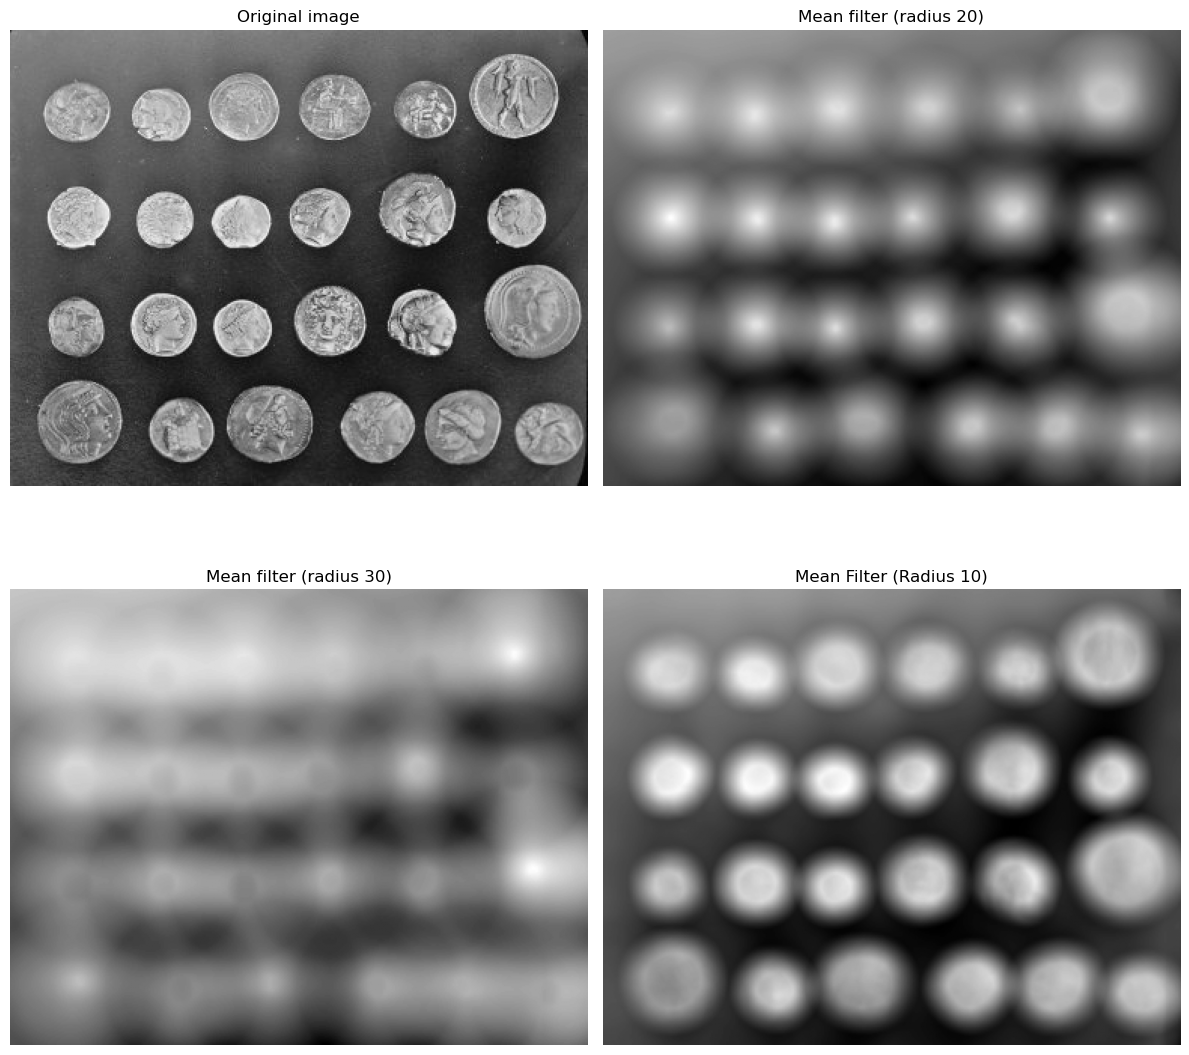

In [49]:
# solution
# Load image of coins (make sure path is correct)
image = io.imread('imageio:coins.png')

# Define a disk with radius 20
selem_20 = morphology.disk(20)

# Apply the mean filter with a disk with radius 20
mean_filtered_20 = filters.rank.mean(image, selem_20)

# Increase the radius to 30 and apply the mean filter
selem_30 = morphology.disk(30)
mean_filtered_30 = filters.rank.mean(image, selem_30)

# Decrease the radius to 10 and apply the mean filter
selem_10 = morphology.disk(10)
mean_filtered_10 = filters.rank.mean(image, selem_10)

# Display images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
# Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original image')
axes[0, 0].axis('off')

# Image after mean filter with radius 20
axes[0, 1].imshow(mean_filtered_20, cmap='gray')
axes[0, 1].set_title('Mean filter (radius 20)')
axes[0, 1].axis('off')

# Image after mean filter with radius 30
axes[1, 0].imshow(mean_filtered_30, cmap='gray')
axes[1, 0].set_title('Mean filter (radius 30)')
axes[1, 0].axis('off')

# Image after mean filter with radius 10
axes[1, 1].imshow(mean_filtered_10, cmap='gray')
axes[1, 1].set_title('Mean Filter (Radius 10)')
axes[1, 1].axis('off')

# Show results
plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

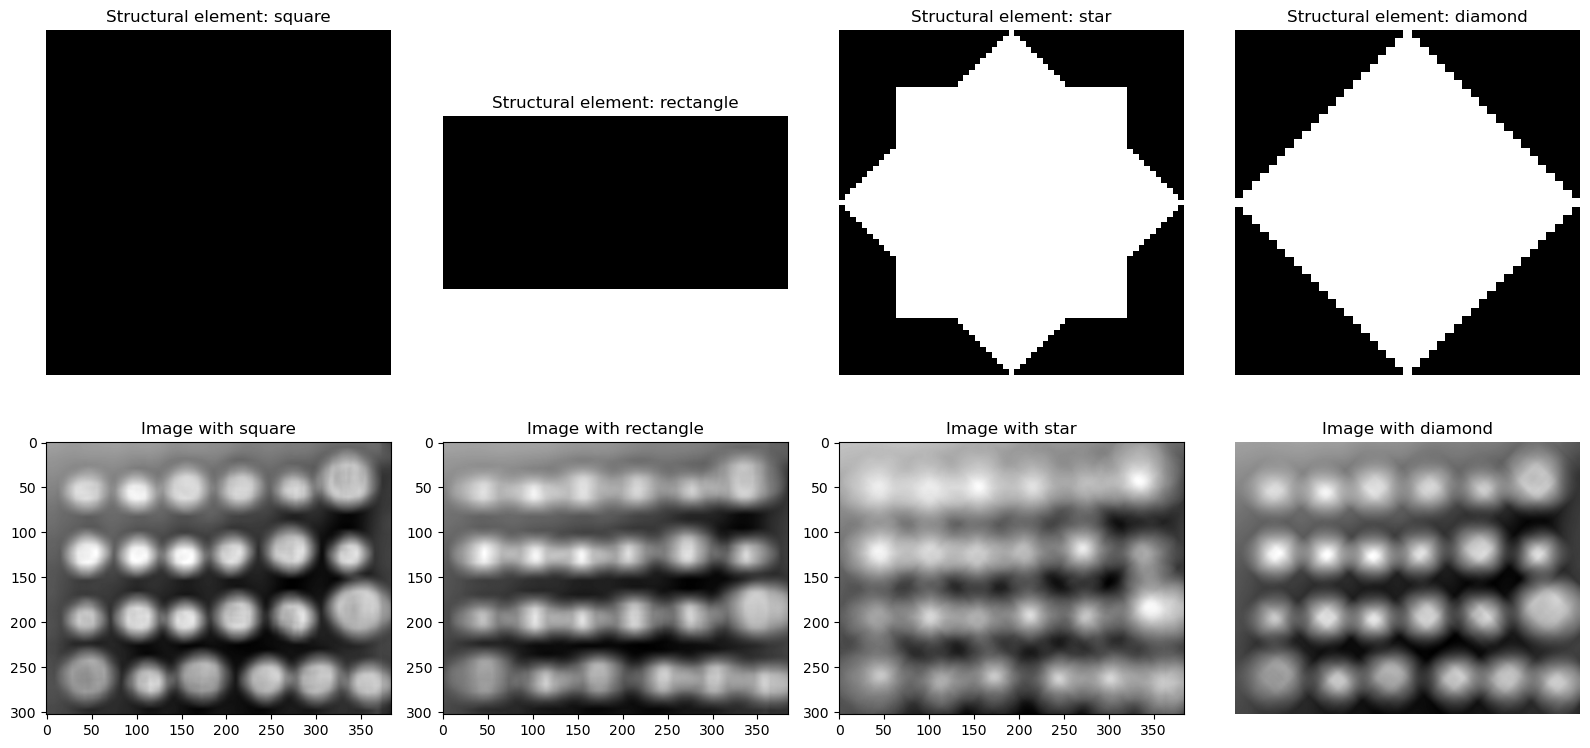

In [51]:
# Load the image of coins (make sure the path is correct)
image = io.imread('imageio:coins.png')

# Define the different structural elements
selem_square = morphology.square(20) # Square
selem_rectangle = morphology.rectangle(20, 40) # Rectangle
selem_star = morphology.star(20) # Star
selem_diamond = morphology.diamond(20) # Diamond

# Apply the mean filter to each structural element
mean_filtered_square = filters.rank.mean(image, selem_square)
mean_filtered_rectangle = filters.rank.mean(image, selem_rectangle)
mean_filtered_star = filters.rank.mean(image, selem_star)
mean_filtered_diamond = filters.rank.mean(image, selem_diamond)

# Display the results using a 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Display the structural element in the first row with the resulting images in the second row
selems = [selem_square, selem_rectangle, selem_star, selem_diamond]
filtered_images = [mean_filtered_square, mean_filtered_rectangle, mean_filtered_star, mean_filtered_diamond]
titles = ['square', 'rectangle', 'star', 'diamond']

for i, (selem, filtered_image, title) in enumerate(zip(selems, filtered_images, titles)):

    # Display the structural element
    axes[0, i].imshow(selem, cmap='gray')
    axes[0, i].set_title(f'Structural element: {title}')
    axes[0, i].axis('off')

    # Display the resulting image
    axes[1, i].imshow(filtered_image, cmap='gray')
    axes[1, i].set_title(f'Image with {title}')
axes[1, i].axis('off')

# Display the results
plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*Increasing the radius of structural elements such as a disk increases the smoothing effect, as it blends more neighboring pixels together, making the image smoother. Decreasing the radius results in less smoothing, as the effect is limited to fewer pixels.*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*Changing the type of structural element affects the shape of the smoothing:

- A square smooths evenly in all directions.
- A rectangle smooths more in one direction.
- A star provides a more detailed smoothing effect in certain areas.
- A diamond smooths unevenly in directions, enhancing some details.*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

* The median filter is used to smooth an image by taking the average of the neighboring values, but it may cause loss of detail.

- The Gaussian filter is used to smooth an image while preserving detail using the Gaussian function, and gives better results when dealing with noise.

- Uses of the median filter: Reduce random noise.*

...